In [115]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [116]:
df=pd.read_csv('file:///C:/Users/SR%20COMPUTER/Downloads/Compressed/Clean_Dataset.csv')

In [117]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [118]:
df.shape

(300153, 12)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [120]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [121]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4.0,0.483706,0.472230,0.014638,0.122915,0.460092,0.820883,1.0
duration,4.0,0.331018,0.458342,-0.039157,0.109466,0.181614,0.403167,1.0
days_left,4.0,0.220883,0.521231,-0.091949,-0.052355,-0.012259,0.260979,1.0
price,4.0,0.468363,0.500699,-0.091949,0.130180,0.482700,0.820883,1.0


In [122]:
df.min()

Unnamed: 0                  0
airline               AirAsia
flight                 6E-102
source_city         Bangalore
departure_time      Afternoon
stops                     one
arrival_time        Afternoon
destination_city    Bangalore
class                Business
duration                 0.83
days_left                   1
price                    1105
dtype: object

In [123]:
df.max()

Unnamed: 0           300152
airline             Vistara
flight               UK-996
source_city          Mumbai
departure_time        Night
stops                  zero
arrival_time          Night
destination_city     Mumbai
class               Economy
duration              49.83
days_left                49
price                123071
dtype: object

In [124]:
df.skew()

Unnamed: 0    0.000000
duration      0.602899
days_left    -0.035464
price         1.061377
dtype: float64

In [125]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [126]:
df.drop(['Unnamed: 0'],axis=1,inplace = True)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [127]:
column=[column for column in df.columns if df[column].dtype=='object']
column

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [128]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [129]:
categorical = df[column]

In [130]:
categorical

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy
...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business


In [131]:
categorical['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

<AxesSubplot:xlabel='airline', ylabel='price'>

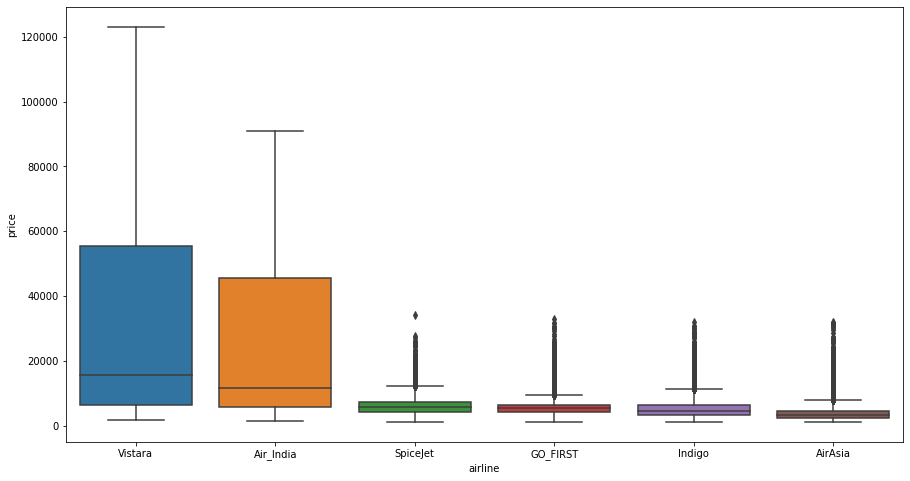

In [132]:
plt.figure(figsize=(15,8))
sns.boxplot(x='airline',y='price',data=df.sort_values('price',ascending=False))

In [133]:
categorical['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

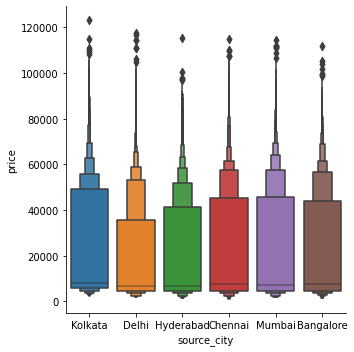

In [134]:
sns.catplot(x='source_city',y='price',data=df.sort_values('price',ascending=False),kind='boxen')

In [135]:
categorical['destination_city'].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

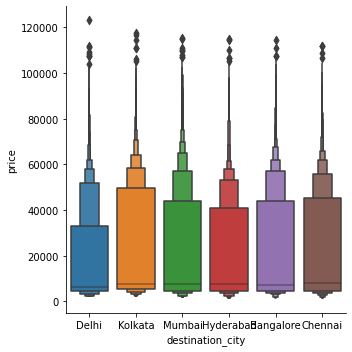

In [136]:
sns.catplot(x='destination_city',y='price',data=df.sort_values('price',ascending=False),kind='boxen')

In [137]:
categorical['departure_time'].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

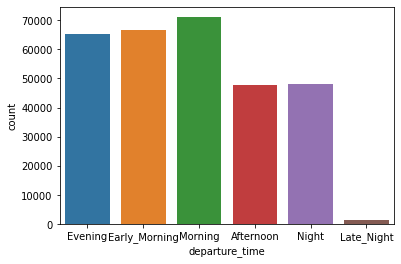

In [138]:
ax = sns.countplot(x="departure_time", data=categorical)

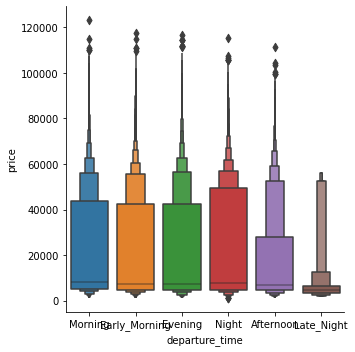

In [139]:
sns.catplot(x='departure_time',y='price',data=df.sort_values('price',ascending=False),kind='boxen')

In [140]:
categorical['arrival_time'].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

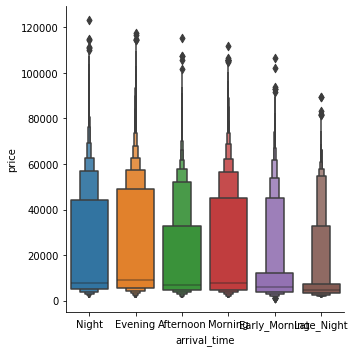

In [141]:
sns.catplot(x='arrival_time',y='price',data=df.sort_values('price',ascending=False),kind='boxen')

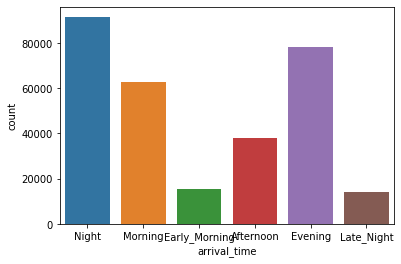

In [142]:
ax = sns.countplot(x="arrival_time", data=categorical)

In [143]:
categorical['class'].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

<Figure size 1080x1080 with 0 Axes>

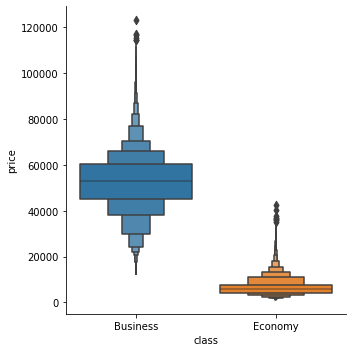

In [144]:
plt.figure(figsize=(15,15))
sns.catplot(x='class',y='price',data=df.sort_values('price',ascending=False),kind='boxen')

In [145]:
df[df['price'] == df['price'].max()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
261377,Vistara,UK-772,Kolkata,Morning,one,Night,Delhi,Business,13.5,3,123071


In [146]:
df[df['price'] == df['price'].min()]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


In [147]:
for i  in df.columns:
    print(f'unique values in column "{i}" is\n {df[i].value_counts()}')
    print('-------------------------------------------------')

unique values in column "airline" is
 Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64
-------------------------------------------------
unique values in column "flight" is
 UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64
-------------------------------------------------
unique values in column "source_city" is
 Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64
-------------------------------------------------
unique values in column "departure_time" is
 Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64
----

In [148]:
import dtale
dtale.show(df)

In [149]:
object_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        object_col.append(i)
    else:
        num_col.append(i)

In [150]:
object_col

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class']

In [151]:
num_col

['duration', 'days_left', 'price']

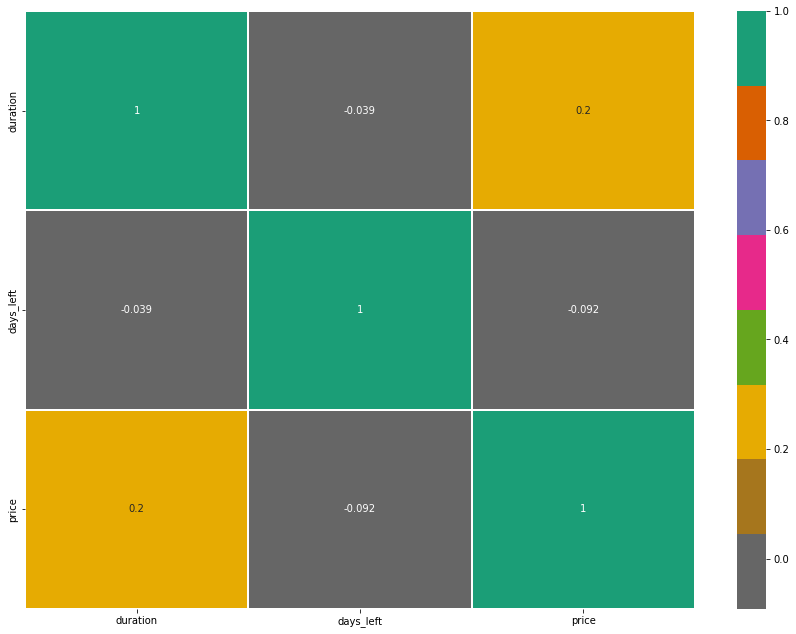

In [152]:
plt.figure(figsize=(15,11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

In [153]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

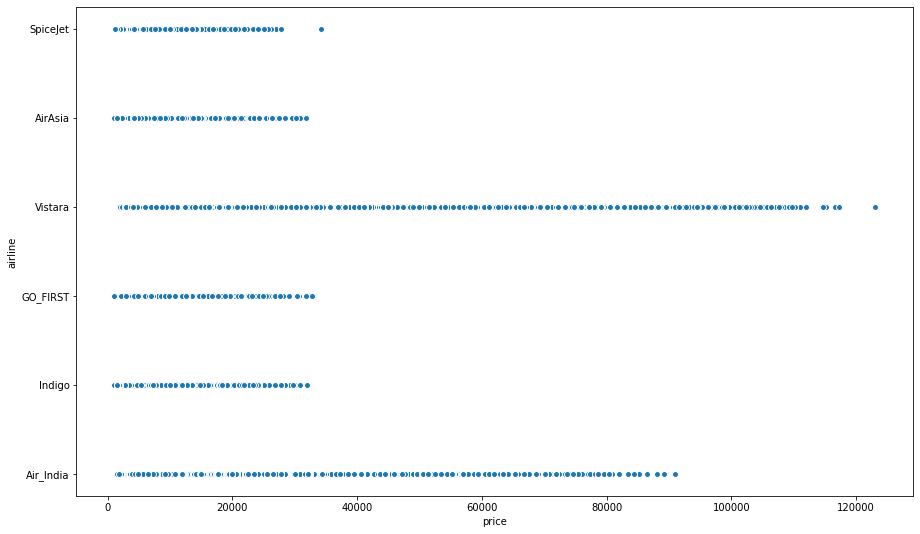

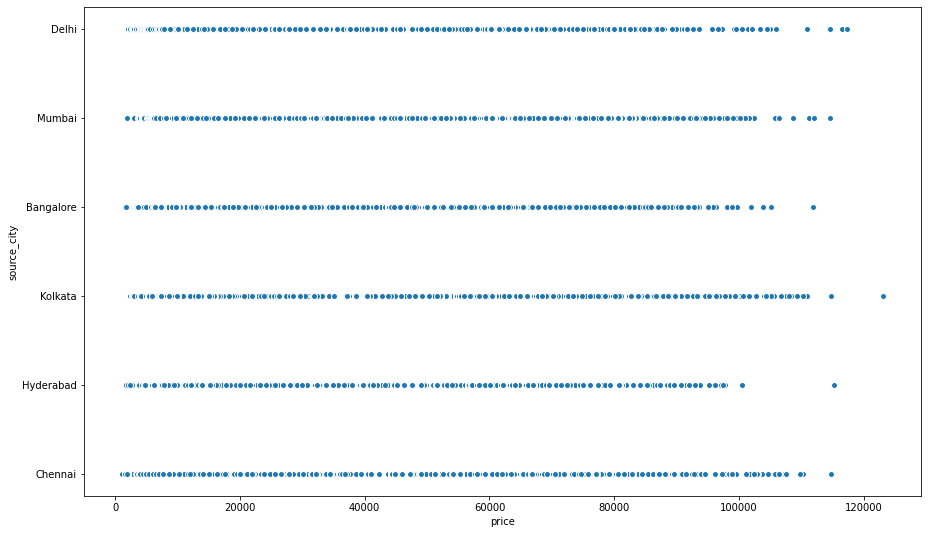

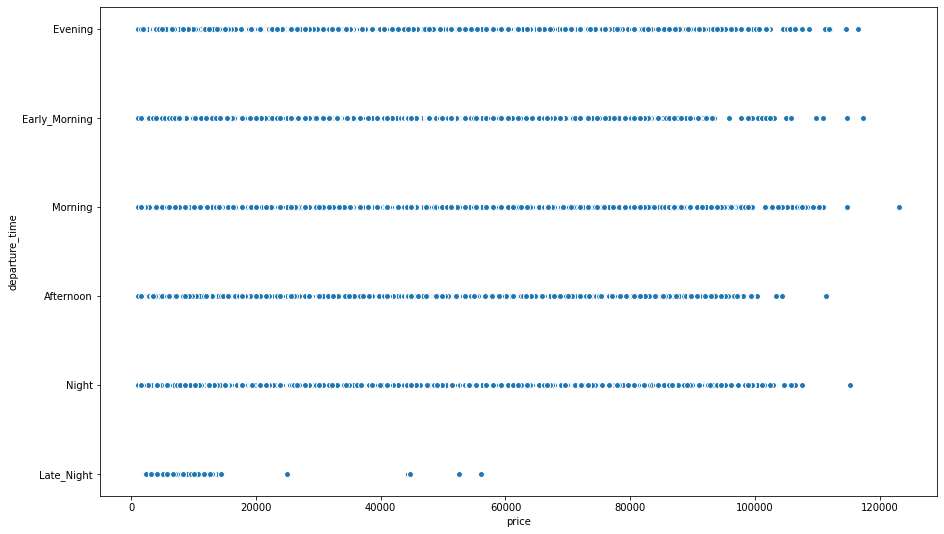

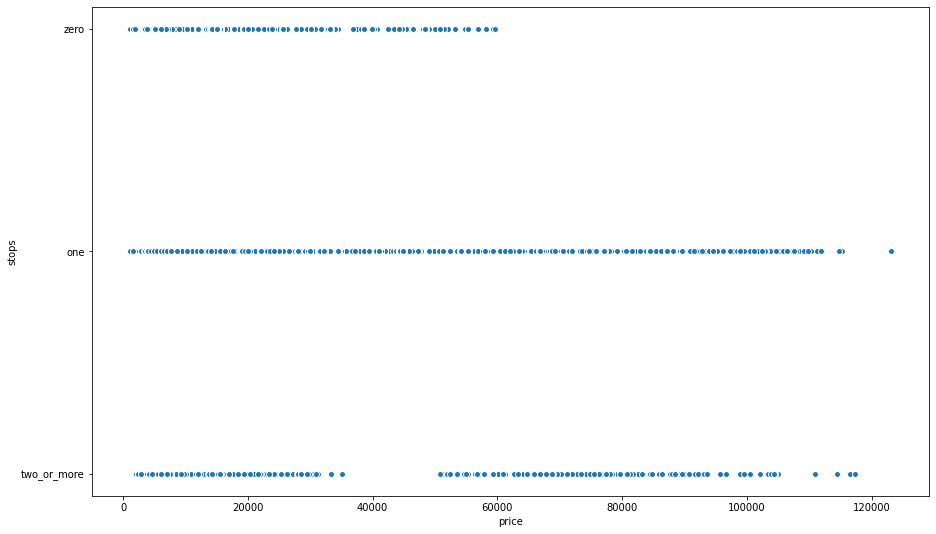

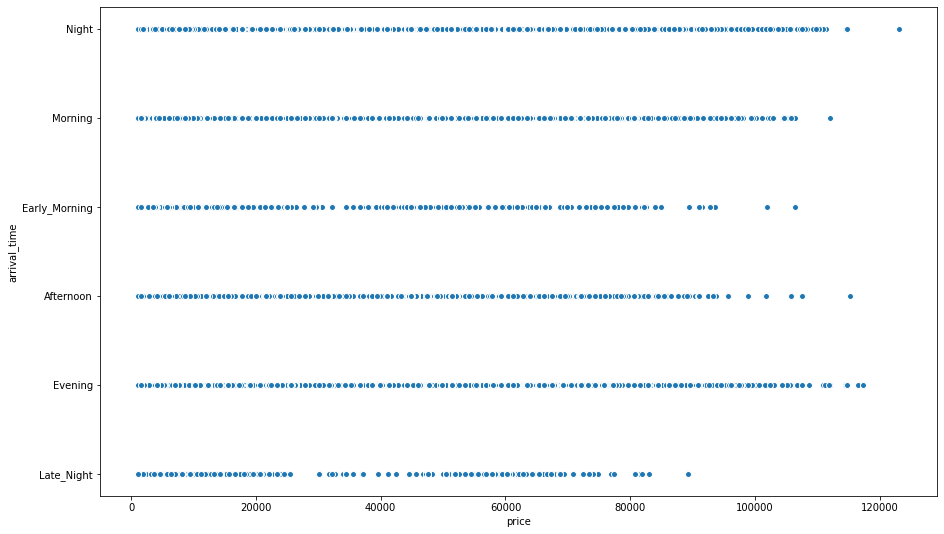

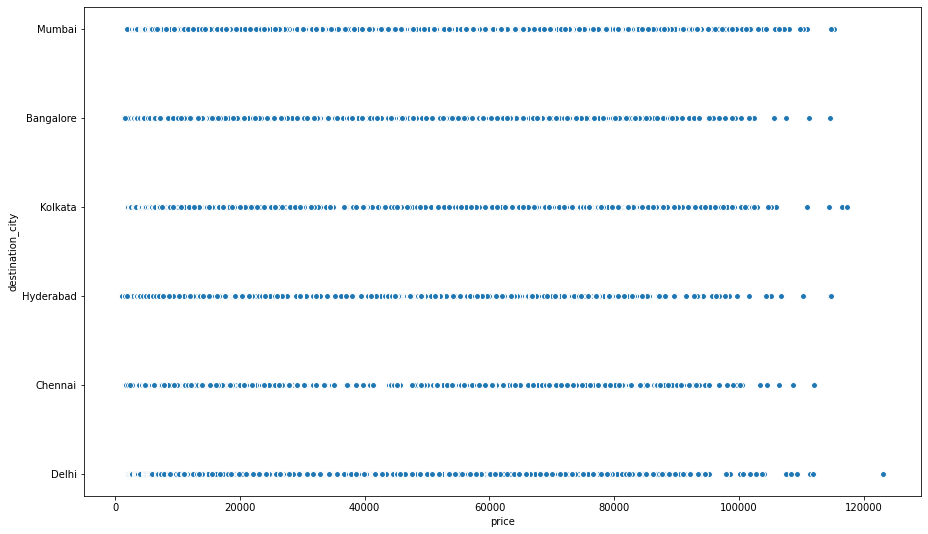

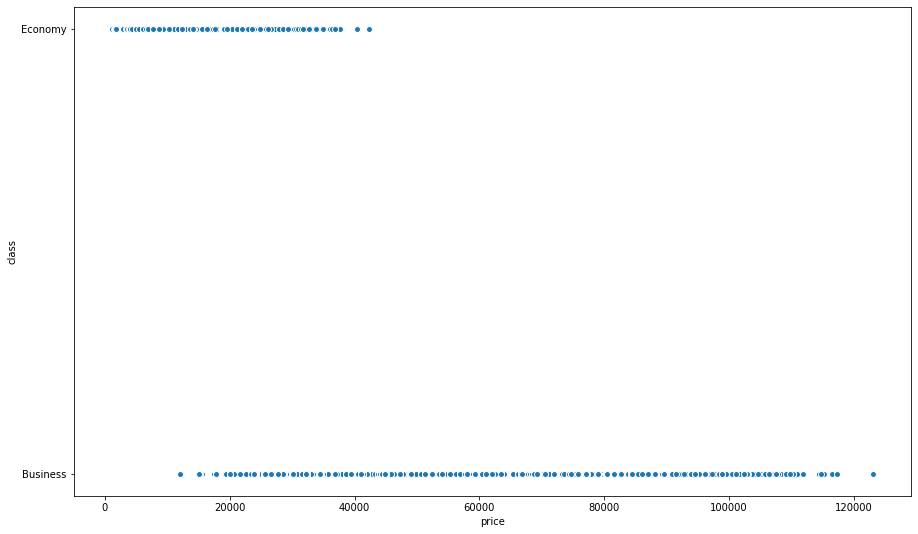

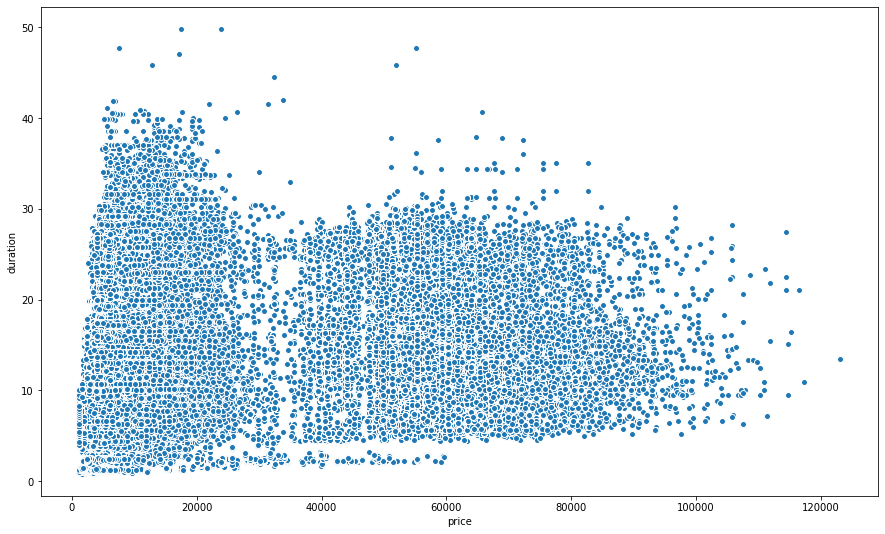

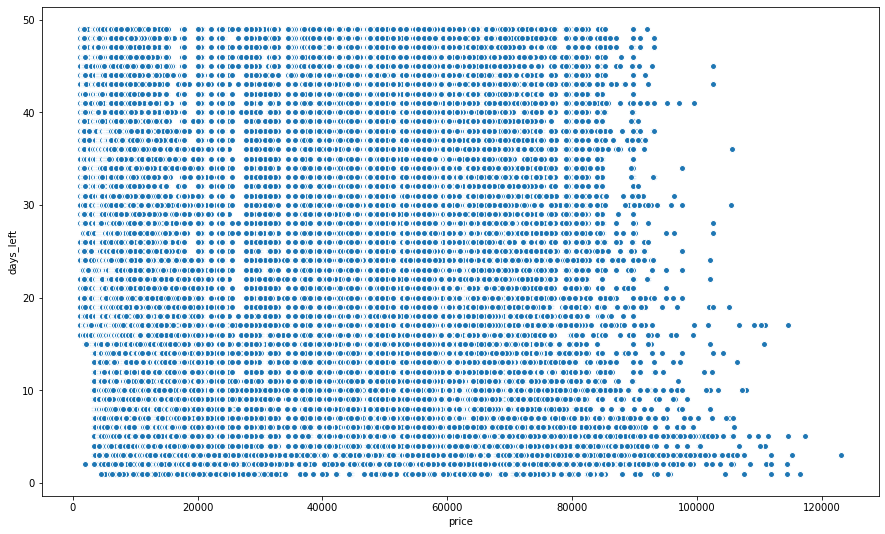

In [154]:
for i in ['airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left']:
    plt.figure(figsize=(15,9))
    sns.scatterplot(x=df.price,y=df[i],data=df,linewidth=1,)
    plt.show()

In [155]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [157]:
df['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [158]:
dummies1=pd.get_dummies(df['airline'])
dummies1

,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
300148,0,0,0,0,0,1
300149,0,0,0,0,0,1
300150,0,0,0,0,0,1
300151,0,0,0,0,0,1


In [159]:
pd.concat([df,dummies1],axis=0)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,AirAsia,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,NaN,NaN,NaN,NaN,NaN,NaN
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,NaN,NaN,NaN,NaN,NaN,NaN
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,NaN,NaN,NaN,NaN,NaN,NaN
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
300149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
300150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0
300151,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0


In [160]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [161]:
df=df.drop(['airline'],axis='columns')

In [162]:
[features for features in df.columns if df[features].isnull().sum()>0]

[]

# df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flight            300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [164]:
df.head()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [165]:
df['flight'].value_counts()

UK-706     3235
UK-772     2741
UK-720     2650
UK-836     2542
UK-822     2468
           ... 
SG-9923       1
6E-6474       1
6E-865        1
G8-705        1
G8-107        1
Name: flight, Length: 1561, dtype: int64

In [166]:
df['flight']=df['flight'].fillna(df['flight'].mode()[0])

In [167]:
df['source_city'].isnull().sum()

0

In [168]:
df['source_city'].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [169]:
df['source_city']=df['source_city'].fillna(df['source_city'].mode()[0])

In [170]:
df['departure_time'].isnull().sum()

0

In [171]:
df['departure_time']=df['departure_time'].fillna(df['departure_time'].mode()[0])

In [172]:
df['stops'].isnull().sum()

0

In [173]:
df['stops']=df['stops'].fillna(df['stops'].mode()[0])

In [174]:
df['stops'].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [175]:
df['arrival_time']=df['arrival_time'].fillna(df['arrival_time'].mode()[0])

In [176]:
df['destination_city']=df['destination_city'].fillna(df['destination_city'].mode()[0])

In [177]:
df['class']=df['class'].fillna(df['class'].mode()[0])

In [178]:
df.head()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [179]:
df['duration'].isnull().sum()

0

In [180]:
df['duration'].value_counts()

2.17     4242
2.25     4036
2.75     2879
2.08     2755
2.83     2323
         ... 
37.17       1
38.75       1
38.50       1
36.25       1
41.50       1
Name: duration, Length: 476, dtype: int64

In [181]:
df['duration']=df['duration'].fillna(df['duration'].mean())

In [182]:
df['days_left']=df['days_left'].fillna(df['days_left'].mean())

In [183]:
df['price']=df['price'].fillna(df['price'].mean())

In [184]:
df.head()

,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [185]:
df['AirAsia'].isnull().sum()

KeyError: 'AirAsia'

In [ ]:
df['AirAsia']=df['AirAsia'].fillna(df['AirAsia'].mode()[0])

In [ ]:
df['Air_India']=df['Air_India'].fillna(df['Air_India'].mode()[0])

In [ ]:
df['GO_FIRST']=df['GO_FIRST'].fillna(df['GO_FIRST'].mode()[0])

In [ ]:
df['Indigo']=df['Indigo'].fillna(df['Indigo'].mode()[0])

In [ ]:
df['SpiceJet']=df['SpiceJet'].fillna(df['SpiceJet'].mode()[0])

In [ ]:
df['Vistara']=df['Vistara'].fillna(df['Vistara'].mode()[0])

In [ ]:
df.isnull().sum()

In [ ]:
df.head(2)

In [ ]:
df['source_city'].value_counts()